<a href="https://colab.research.google.com/github/2303A51188/ADM/blob/main/ADM_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data1 = {
    'Feature1':[1,2,3,4,5,6,7,8,9,10],
    'Feature2':[2,3,4,5,6,7,8,9,10,11],
    'Feature3':[3,4,5,6,7,8,9,10,11,12],
    'Target':[5,7,9,11,13,15,17,19,21,23]
}

df = pd.DataFrame(data1)

X = df[['Feature1','Feature2','Feature3']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficients: [0.66666667 0.66666667 0.66666667]
Intercept: 0.9999999999999982
Mean Squared Error: 1.5777218104420236e-30
R-squared: 1.0


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('advertising.csv')
data.keys()


Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [15]:
print(data.isnull().sum())

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


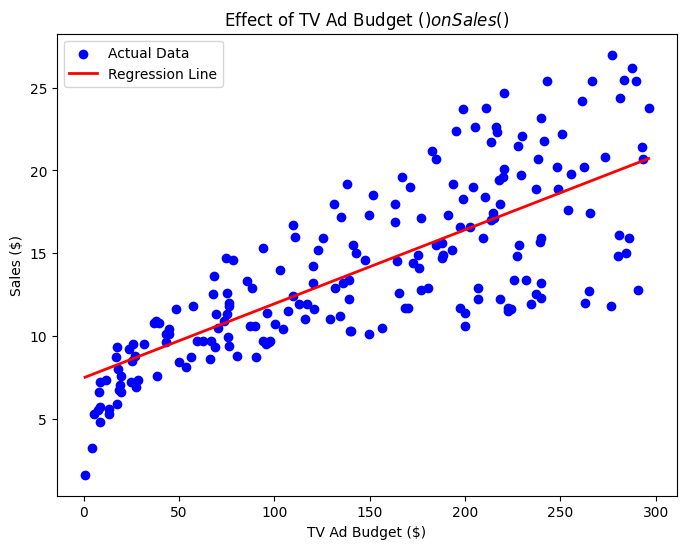

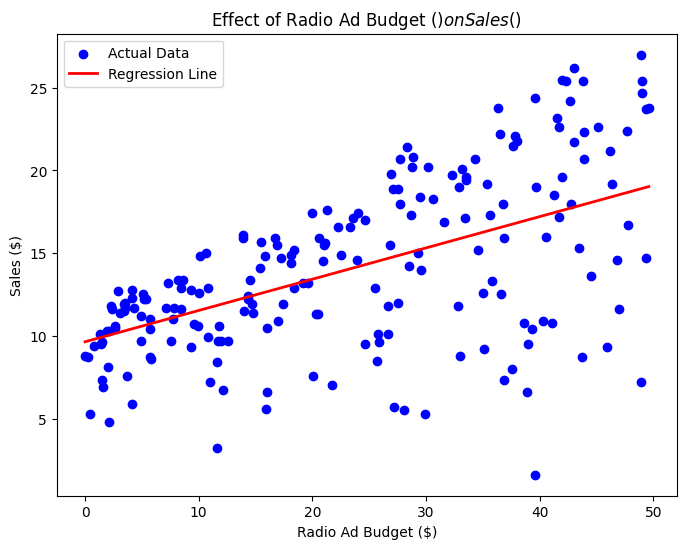

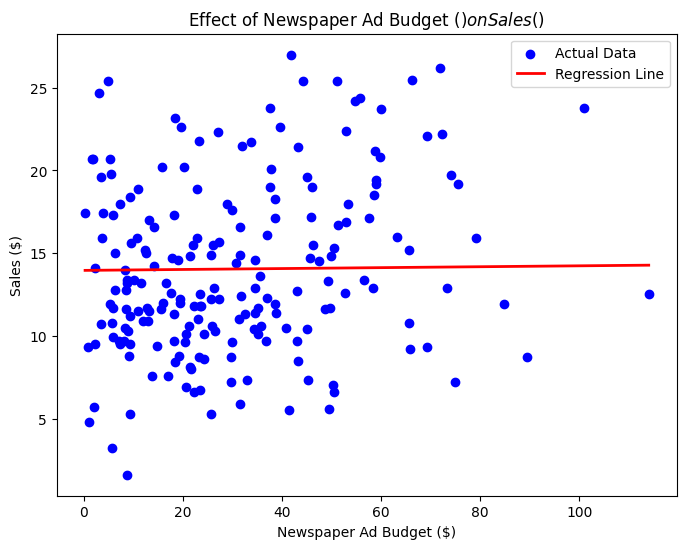

In [25]:


df = pd.DataFrame(data)

X = df[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]
y = df['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, color="blue", label="Actual Data")
    x_range = np.linspace(X[feature].min(), X[feature].max(), 100)

    X_mean = X.mean()
    X_plot = pd.DataFrame(np.tile(X_mean.values, (100, 1)), columns=X.columns)
    X_plot[feature] = x_range


    y_line = model.predict(X_plot)


    plt.plot(x_range, y_line, color="red", linewidth=2, label="Regression Line")
    plt.xlabel(feature)
    plt.ylabel("Sales ($)")
    plt.title(f"Effect of {feature} on Sales ($)")
    plt.legend()
    plt.show()